# **Taller X: Ceros de funciones**

---

Son tiempos de guerra civil. Naves rebeldes han atacado desde una base secreta y han obtenido su primera victoria contra el malvado Imperio Galáctico. Durante la batalla, espías rebeldes lograron robar los planos secretos del arma más extrema del Imperio: la **Estrella de la Muerte**, una estación espacial blindada con suficiente potencia como para destruir un planeta entero. Es así como la nave conocida como el **Halcón Milenario** y comandada por **Han Solo** se encuentra en una misión especial: destruir la Estrella de la Muerte construida por el maléfico **Lord Sith**.

Cercanas a la Estrella se encuentran **naves estelares** protegiéndola, a la espera de la detección de intrusos rebeldes para destruirlos. Para evadir los radares de las naves estelares dispersas en su trayecto, el Halcón Milenario debe moverse lentamente en **línea recta** y con sus escudos desactivados.

En consecuencia, nuestro objetivo es decidir si es necesario enviar una señal de alerta a Han Solo en su trayecto a la Estrella de la Muerte cuando se encuentre a una **distancia crítica** de las naves estelares que la protegen. De esa forma, él podrá activar sus escudos y llegar a salvo a su destino.

Downloading...
From: https://drive.google.com/uc?id=1x8RJNK1dwH1Mb8T2aTovkkkXqNdJ65C9
To: /content/trayectory.png
100% 121k/121k [00:00<00:00, 47.3MB/s]


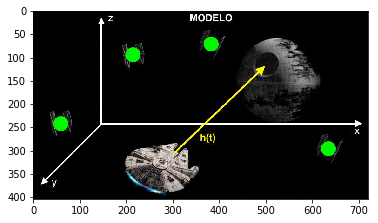

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

!pip install gdown
#https://drive.google.com/uc?id=file_id
!gdown -O trayectory.png https://drive.google.com/uc?id=1x8RJNK1dwH1Mb8T2aTovkkkXqNdJ65C9
  
img = mpimg.imread('trayectory.png')
plt.imshow(img)

Sean $y_1,\ \dots,\ y_n \in\mathbb{R}^3$ las ubicaciones de las naves estelares en el espacio (puntos verdes en la figura), y sea $h:[0,1]\to\mathbb{R}^3$ la función de trayectoria del Halcón Milenario, expresada como una trayectoria paramétrica en función del tiempo. Asumimos que la trayectoria es una **recta**, es decir $h(t) = at+b$, con $a,b\in\mathbb{R}^3$ (ver modelo en la figura). En el instante $t\in[0,1]$, Han Solo estará en la posición $h(t)$, y su **nivel de peligro**
está dado por:
\begin{equation}
A(t) \ =\ \sum_{i=1}^n {\frac{1}{\| h(t) - y_i\|_2}}
\end{equation}
Es decir, cada nave estelar aporta al nivel de peligro una cantidad que es inversamente proporcional a la distancia del Halcón Milenario a la nave estelar.  Si en algún instante $t\in[0,1]$ el nivel de peligro $A(t)$ es mayor o igual que un cierto **valor crítico** $C$, Han Solo deberá ser alertado para que active sus escudos y llegar a salvo a la Estrella de la Muerte.

## Objetivo

El objetivo del Taller es implementar y comparar métodos numéricos para hallar algún instante de tiempo donde se alcance un nivel de peligro crítico de modo de alertar a Han Solo.

## Ejercicio 1 - Función crítica
Plantear una ecuación no lineal $f(t)=0$ tal que una raíz de ella indique que Han Solo debe ser alertado (es decir, el nivel de peligro es crítico). 

<font color="color:red">RTA</font>

f(t) = A(t) - C

## Ejercicio 2: Newton-Raphson
**a)** Calcular explícitamente la derivada de $f$ y plantear la iteración de Newton-Raphson para hallar una raíz de $f$. Definir $f$ y su derivada en el código a continuación, así como la implementación del método.
 
 Utilizar los siguientes valores:
 \begin{align*}
 C&=1 \\
 y_{1}&=(2,3,-0.5) \\
 y_{2}&=(2,0.5,0.5) \\
 a&=(3,1,1) \\
 b&=(1,1,-0.5)
 \end{align*}
 

In [0]:
import numpy as np
import matplotlib as mlt
import numpy.linalg as eig
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Parámetros de la recta
a = np.array([3,1,1])
b = np.array([1,1,-0.5])

# Coordenadas de las naves estelares en R^{3 x n}
y = np.array([[2,3,-0.5], [2,0.5,0.5]])

# Cota para el nivel de aturdimiento
C = 1

# Función a encontrar la raíz
def F(x):
    
    return A(x) - C
    
    pass   

# Derivada de F
def dF(x):
    
    return dA(x)
    pass   

def A(x):
    hx = x*a + b
    resta = y - hx
    # Calculamos la norma por filas y luego damos vuelta
    cociente = 1 / np.linalg.norm(resta, 2, axis=1)
    return np.sum(cociente)

def dA(x):
    hx = x*a + b
    resta = y - hx
    zz = resta * a.T
    zy = (np.linalg.norm(resta,2,axis=1))**3
    zy = np.reshape(zy, (-1,1))
    cociente = zz / zy
    return np.sum(cociente)
    pass   



b) Mostrar que Newton-Raphson cumple las condiciones del teorema de punto fijo en algún intervalo incluido en  [0,1]  con lo cual puede asegurarse la convergencia del método en dicho intervalo.


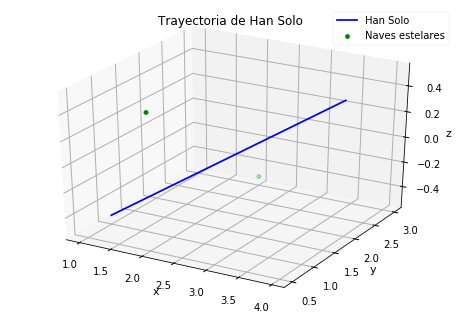

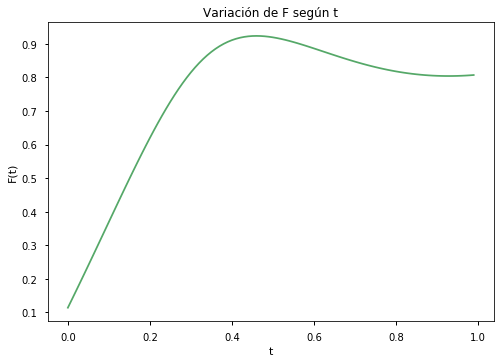

In [120]:

# Gráfico de la trayectoria
ts = np.arange(0, 1, 0.01)

xs = np.array([a*i + b for i in ts])
ys = np.array([np.array(i) for i in y])

fig = plt.figure()
mlt.style.use('seaborn-notebook')
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Trayectoria de Han Solo')
ax.plot3D(xs.T[0], xs.T[1], xs.T[2], "blue", label="Han Solo")
ax.scatter3D(ys.T[0], ys.T[1], ys.T[2], c="green", label="Naves estelares")
ax.legend(fancybox=True)

# Gráfico de F
fs = np.vectorize(F)(ts)

fig2 = plt.figure()
ax2 = plt.axes()
ax2.set_xlabel('t')
ax2.set_ylabel('F(t)')
ax2.set_title('Variación de F según t')
ax2.plot(ts, fs+ts, c='C1')

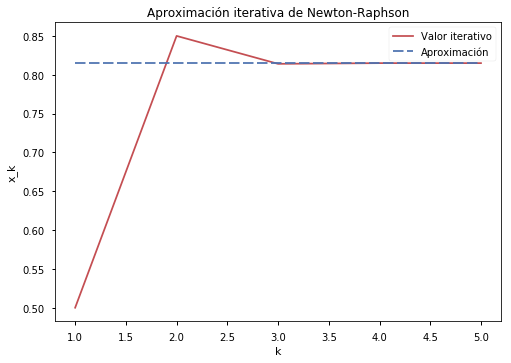

In [116]:
def NewtonRaphson(x0, tol, iteraciones):
    x = x0
    contador = 0
    seq_x = [x]
    
    while (abs(F(x)) > tol and contador < iteraciones):
        """
        Completar línea de iteración
        """
        x = x - F(x)/dF(x)
        
        contador += 1
        seq_x.append(x)

    return (seq_x, x)

"""
Completar con valor inicial aquí
"""
x0 = 0.5
tol = 0.00000001 
iteraciones = 40

seq_nr, value_nr = NewtonRaphson(x0, tol, iteraciones)
its_nr = np.arange(1, len(seq_nr)+1)
err_nr = np.vectorize(abs)(seq_nr) - value_nr

fig3 = plt.figure()
ax3 = plt.axes()
ax3.set_xlabel('k')
ax3.set_ylabel('x_k')
ax3.set_title('Aproximación iterativa de Newton-Raphson')
ax3.plot(its_nr, seq_nr, c='C2', label='Valor iterativo')
ax3.plot(its_nr, np.full(its_nr.shape, value_nr), dashes=[6,2], c='C0', label='Aproximación')
ax3.legend(fancybox=True)

<font color="color:red">Desarrolle su explicación aquí</font>

## Ejercicio 3 - Bisección
Comparar las velocidades de convergencia de los métodos de Bisección y Newton-Raphson.
Para ello, basarse en $\{ x_{k}^{(M)}\}_{k=0,\ \ldots}$ que es la sucesión de puntos del método $M$ convergentes a la raíz $r$ de $f$, donde $M$ es Newton-Raphson o Bisección. Graficar y mostrar los valores del error $e^M_k=|r-x_{k}^{(M)}|$.

In [0]:
# BISECCIÓN

def Biseccion(x0, x1, tol, iteraciones):
    seq_p = []
    x_left = x0
    x_right = x1

    for c in range(iteraciones):
        """
        Completar línea de iteración
        """
        p = (x_right+x_left)/2 
        fp = F(p)
        seq_p.append(p)

        if (abs(fp) < tol or (x_right-x_left)/2 < tol): 
            break

        if (F(x_left)*fp > 0): 
            x_left = p;       
        else: 
            x_right = p;
       
    return (seq_p, p)
  


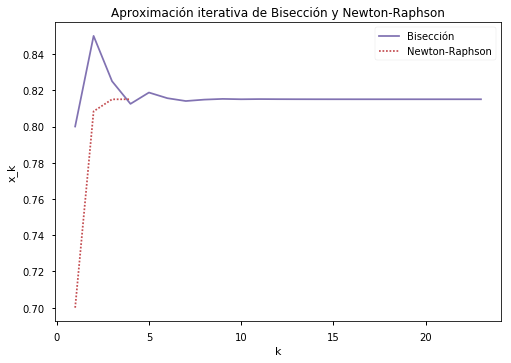

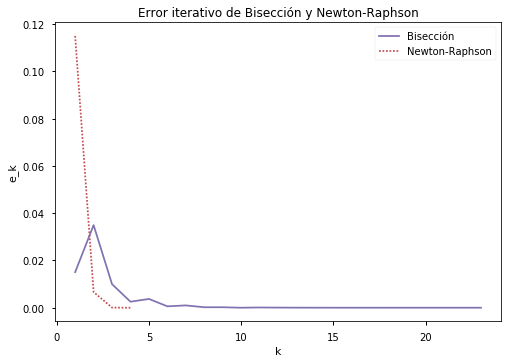

In [102]:
"""
Elegir límites del rango inicial
"""
x0 = 0.7
x1 = 0.9

tol = 0.00000001 
iteraciones = 40

"""
Ejecutamos bisección
"""
seq_bic, value_bic = Biseccion(x0, x1, tol, iteraciones)
its_bic = np.arange(1, len(seq_bic)+1)
err_bic = np.vectorize(abs)(np.array(seq_bic) - value_bic)

"""
Ejecutamos Newton Raphson
"""
seq_nr, value_nr = NewtonRaphson(x0, tol, iteraciones)
its_nr = np.arange(1, len(seq_nr)+1)
err_nr = np.vectorize(abs)(np.array(seq_nr) - value_nr)

fig4 = plt.figure()
mlt.style.use('seaborn-deep')
ax4 = plt.axes()
ax4.set_xlabel('k')
ax4.set_ylabel('x_k')
ax4.set_title('Aproximación iterativa de Bisección y Newton-Raphson')
ax4.plot(its_bic, seq_bic, c='C3', label='Bisección')
ax4.plot(its_nr, seq_nr, c='C2', dashes=[1,1], label='Newton-Raphson')
ax4.legend(fancybox=True)

fig5 = plt.figure()
ax5 = plt.axes()
ax5.set_xlabel('k')
ax5.set_ylabel('e_k')
ax5.set_title('Error iterativo de Bisección y Newton-Raphson')
ax5.plot(its_bic, err_bic, c='C3', label='Bisección')
ax5.plot(its_nr, err_nr, c='C2', label='Newton-Raphson', dashes=[1,1])
ax5.legend(fancybox=True)

<font color="color:red">Desarrolle su explicación aquí</font>

## Ejercicio 4 - Punto fijo
Mostrar otras dos funciones de punto fijo (diferentes a Newton-Raphson) tales que la raíz de la ecuación no lineal del ejercicio 1 sea punto fijo de dichas funciones.

<font color="color:red">RTA</font>
g(x) = cos. F(x) + x

g(x) = k .F(x) + x

## Ejercicio 5 (Opcional) - Secante
Implementar el método de la Secante y compararlo con los anteriores en cuanto a velocidad de convergencia.

In [0]:
# SECANTE

def Secante(x0, x1, tol, iteraciones):
    contador = 0
    seq_p = []
    p = x0
    x_prev = x0
    x_n = x1

    for contador in range(iteraciones):
        """
        Completar línea de iteración
        """
        p = None
        fp = F(p)
        seq_p.append(p)

        if (abs(fp) < tol or abs(x_n-x_prev)/2 < tol): 
            break 

        x_prev = x_n
        x_n = p
        """
        O con Regula Falsi...
        
        if (F(x_prev)*fp > 0): 
            x_prev = p;       
        else: 
            x_n = p;

        """

    return (seq_p, p)


Ahora, grafiquemos este método

In [0]:
 
"""
Elegir límites del rango inicial
"""
x0 = None
x1 = None
tol = 0.00000001 
iteraciones = 40

seq_bic, value_bic = Biseccion(x0, x1, tol, iteraciones)
its_bic = np.arange(1, len(seq_bic)+1)
err_bic = np.vectorize(abs)(np.array(seq_bic) - value_bic)

seq_nr, value_nr = NewtonRaphson(x0, tol, iteraciones)
its_nr = np.arange(1, len(seq_nr)+1)
err_nr = np.vectorize(abs)(np.array(seq_nr) - value_nr)

seq_sec, value_sec = Secante(x0, x1, tol, iteraciones)
its_sec = np.arange(1, len(seq_sec)+1)
err_sec = np.vectorize(abs)(np.array(seq_sec) - value_sec)

fig6 = plt.figure()
mlt.style.use('seaborn-deep')
ax6 = plt.axes()
ax6.set_xlabel('k')
ax6.set_ylabel('x_k')
ax6.set_title('Aproximación iterativo de Secante y los anteriores')
ax6.plot(its_sec, seq_sec, c='C4', label='Secante')
ax6.plot(its_bic, seq_bic, c='C3', dashes=[1,1], label='Bisección')
ax6.plot(its_nr, seq_nr, c='C2', dashes=[1,1], label='Newton-Raphson')
ax6.legend(fancybox=True)

fig7 = plt.figure()
mlt.style.use('seaborn-deep')
ax7 = plt.axes()
ax7.set_xlabel('k')
ax7.set_ylabel('e_k')
ax7.set_title('Error iterativo de Secante y los anteriores')
ax7.plot(its_sec, err_sec, c='C4', label='Secante')
ax7.plot(its_bic, err_bic, c='C3', dashes=[1,1], label='Bisección')
ax7.plot(its_nr, err_nr, c='C2', dashes=[1,1], label='Newton-Raphson')
ax7.legend(fancybox=True)

<font color="color:red">Desarrolle su explicación aquí</font>

## Ejercicio 6 (Opcional) - Iteración de punto fijo
Lord Kepler, dominando los secretos del lado oscuro de la Fuerza, descubrió las leyes que rigen por sobre el movimiento de los planetas alrededor del Sol (y cualquier otra estrella, incluida la de la Muerte). Los planetas giran en una órbita elíptica, uno de cuyos focos lo ocupa el Sol, pero no lo hacen con un movimiento uniforme, sino cubriendo áreas iguales en tiempos iguales. El plasmado matemático de esta ley es la Ecuación de Kepler que se ve a continuación:
$$ M = E - e \sin{E} $$ donde $M$ es la anomalía media o ángulo que recorrería un planeta ficticio que se moviese con movimiento uniforme a través de la circunferencia principal, $e$ es la excentricidad de la elipse situada entre \textbf{$0 \leq e < 1$} y $E$ es la anomalía excéntrica y la \textbf{incógnita} que permite obtener la posición del planeta. Se pide:

**a)** Probar que si la iteración de punto fijo dada por la función $g(E) = M + e \sin(E)$ converge, entonces converge a una solución de la ecuación de Kepler.

**b)** Dados $M = 1$ y $e = 0.5$,  demostrar que la iteración de punto fijo dada por $g$ converge para cualquier $E_0 \in [1,2]$.

**c)** Plantear la iteración de Newton y probar que converge siempre para cualquier valor de $M$ y $e$, partiendo de un $E_0$ lo suficientemente cercano a la solución.

**Sugerencia:** reescribir la ecuación de Kepler como $0 = E - e \sin{E} - M$.

<font color="color:red">Ingrese su respuesta aquí</font>

## Evaluación

- Se evaluará la resolución de los ejercicios con un coloquio con los docentes durante la clase.
- En caso de no asistir a clase, se debe entregar la resolución por mail a `metnum.lab@gmail.com` hasta el **viernes 28 de junio**, justificando todas las respuestas e incluyendo los **ejercicios opcionales**.